# Lane Detection Use Edge Detection and RANSAC

Import all necessary libraries.

In [6]:
from time import time
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 12.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Part 1 - Image Pre-processing

Display the original example image.

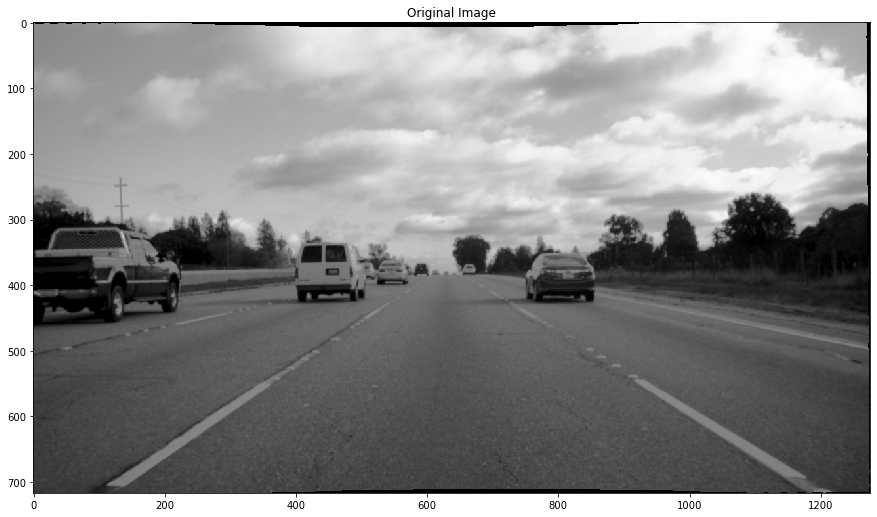

In [7]:
img = io.imread('example_image1.png', as_gray=True) # shape = (717,1276)
plt.imshow(img)
plt.title('Original Image')
plt.show()

 Notice that the above image has some noisy borders which is likely to affect lane detection. Let's prune them out.

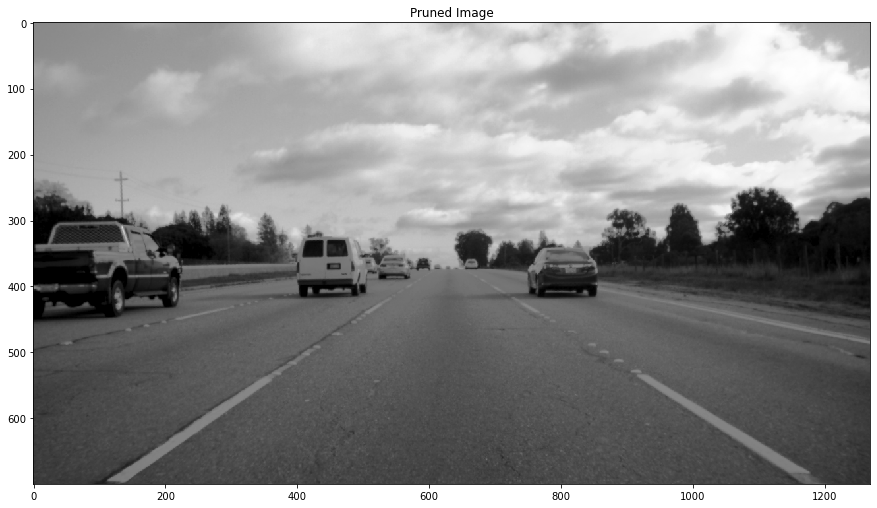

In [12]:
img_pruned = img[10:710,:1270] # shape = (700,1270)
plt.imshow(img_pruned)
plt.title('Pruned Image')
plt.show()

### Part 2 - Edge Detection

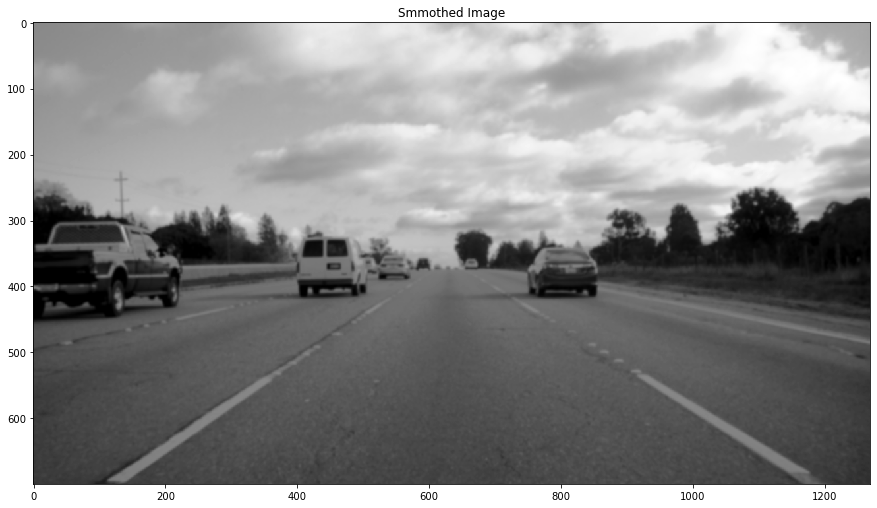

In [19]:
from functions import smoothing
smoothed_img = smoothing(img_pruned, 5, 1.4)
plt.imshow(smoothed_img)
plt.title('Smmothed Image')
plt.show()

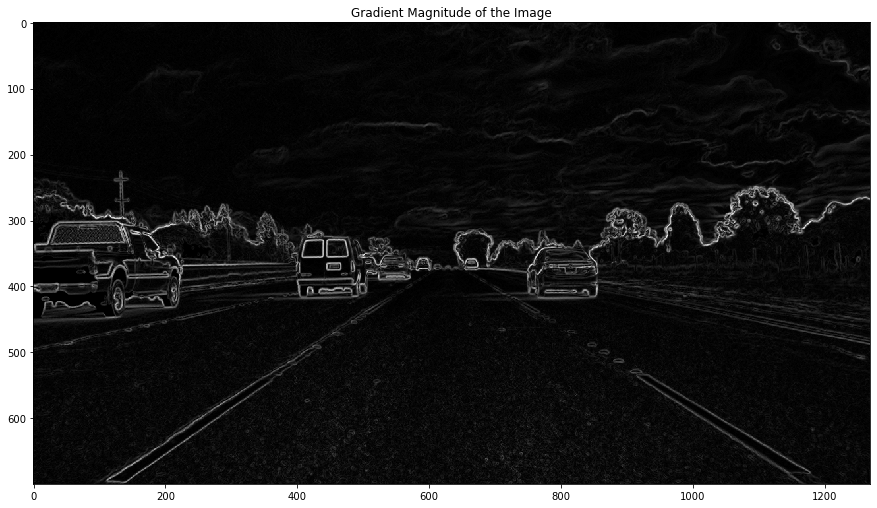

In [48]:
from functions import gradient
gradient, theta = gradient(img_pruned, 5, 1.4)
plt.imshow(gradient)
plt.title('Gradient Magnitude of the Image')
plt.show()

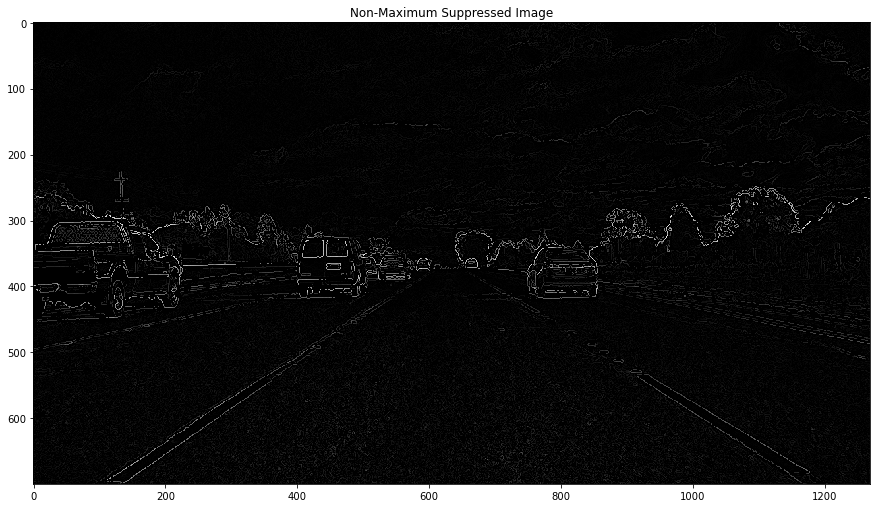

In [28]:
from functions import NMS
NMS_img = NMS(img_pruned, 5, 1.4)
plt.imshow(NMS_img)
plt.title('Non-Maximum Suppressed Image')
plt.show()

### Part 3 - Extract Region of Interest

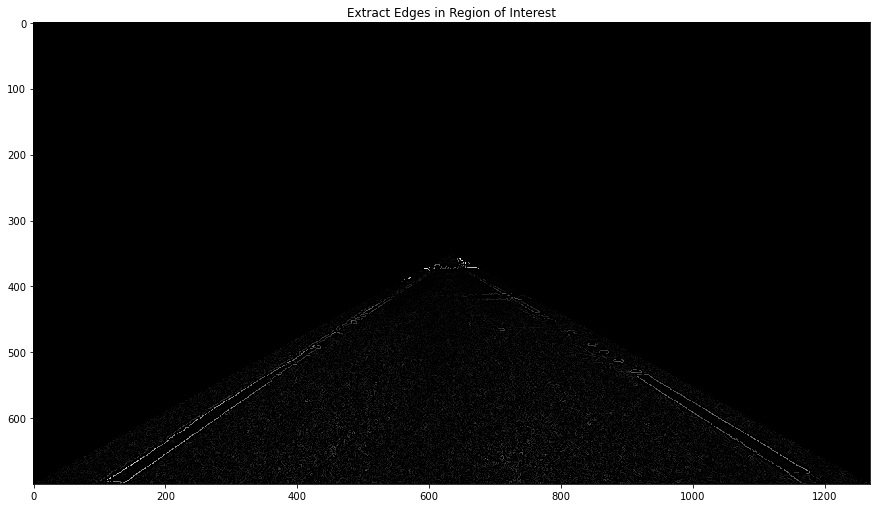

In [51]:
from functions import ROI
roi_img = ROI(NMS_img)
plt.imshow(roi_img)
plt.title('Extract Edges in Region of Interest')
plt.show()

### Part 4 - Apply RANSAC

In [52]:
from functions import RANSAC

# Perform RANSAC on the ROI
acc, rhos, thetas = RANSAC(roi_img)

plt.imshow(img)
plt.plot(xs_left, ys_left, linewidth=5.0)
plt.plot(xs_right, ys_right, linewidth=5.0)
plt.axis('off')
plt.show()

ImportError: cannot import name 'RANSAC' from 'functions' (E:\Stanford_Winter_2122\CS231A\Final_Project\Stanford_CS231A_Project_Lane_Detection\Edge_Detection_Hough_Transform\functions.py)